/tmp/ipykernel_718115/63556106.py:136: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target['Datetime'] += pd.Timedelta(hours=24)
/tmp/ipykernel_718115/63556106.py:136: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target['Datetime'] += pd.Timedelta(hours=24)
/tmp/ipykernel_718115/63556106.py:136: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

/tmp/ipykernel_718115/63556106.py:136: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target['Datetime'] += pd.Timedelta(hours=24)
/tmp/ipykernel_718115/63556106.py:136: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target['Datetime'] += pd.Timedelta(hours=24)
/tmp/ipykernel_718115/63556106.py:136: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

                 Datetime  Radiation
0     2021-03-01 01:00:00          0
1     2021-03-01 02:00:00          0
2     2021-03-01 03:00:00          0
3     2021-03-01 04:00:00          0
4     2021-03-01 05:00:00          0
5     2021-03-01 06:00:00          0
6     2021-03-01 07:00:00          0
7     2021-03-01 08:00:00          1
8     2021-03-01 09:00:00         36
9     2021-03-01 10:00:00         84
10    2021-03-01 11:00:00        111
11    2021-03-01 12:00:00         82
12    2021-03-01 13:00:00          0
13    2021-03-01 14:00:00          0
14    2021-03-01 15:00:00          0
15    2021-03-01 16:00:00          0
16    2021-03-01 17:00:00          0
17    2021-03-01 18:00:00          0
18    2021-03-01 19:00:00          0
19    2021-03-01 20:00:00          0
20    2021-03-01 21:00:00          0
21    2021-03-01 22:00:00          0
22    2021-03-01 23:00:00          0
23    2021-03-02 00:00:00          0
24    2021-03-02 01:00:00          0
25    2021-03-02 02:00:00          0
2

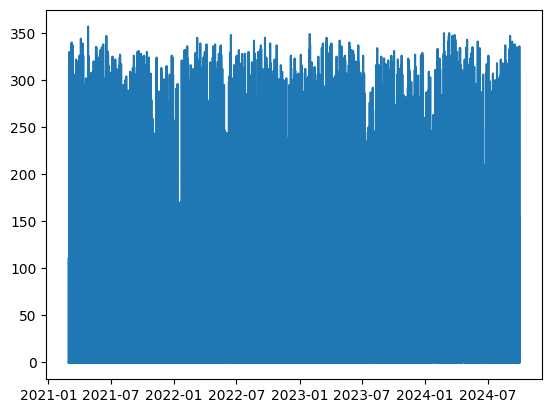

In [16]:
import pandas as pd
import re
import os
import subprocess
import matplotlib.pyplot as plt
import datetime

# ベースURLと年月の範囲（2021年3月から2024年9月まで）
base_url = "https://www.data.jma.go.jp/env/radiation/data/geppo/{}/DR{}_abs.txt" # 短波
# base_url = "https://www.data.jma.go.jp/env/radiation/data/geppo/{}/DL{}_abs.txt" # 赤外
years_months = [f"{year}{month:02}" for year in range(2021, 2025) for month in range(1, 13)]
years_months = [ym for ym in years_months if ym >= "202103" and ym <= "202409"]  # 2021年3月から2024年9月までに限定

# データを保存するディレクトリ
output_dir = "./radiation_data"
# output_dir = "./radiation_DL_data"
os.makedirs(output_dir, exist_ok=True)

def download_data(ym):
    """
    指定された年月のデータをダウンロードしてファイルとして保存する関数。

    Args:
        ym (str): 年月 (例: "202103")
    
    Returns:
        str: ダウンロードしたファイルのパス
    """
    # ファイルパスとURLの設定
    file_path = os.path.join(output_dir, f"DR{ym}_abs.txt") # 短波
    # file_path = os.path.join(output_dir, f"DL{ym}_abs.txt") # 赤外
    url = base_url.format(ym, ym)
    print(f"Downloading data for {ym} from {url}")
    
    # # curlでデータをダウンロード
    # result = subprocess.run(["curl", "-o", file_path, url], capture_output=True, text=True)
    # if result.returncode != 0:
    #     print(f"Failed to download data for {ym}")
    #     return None  # ダウンロードに失敗した場合はNoneを返す

    return file_path, ym


def process_data(file_path, ym):
    """
    ダウンロードしたファイルを読み込み、DataFrameに変換する関数。

    Args:
        file_path (str): ダウンロードしたデータファイルのパス
    
    Returns:
        pd.DataFrame: 日付と放射線量のDataFrame
    """
    all_data = []

    # ファイルを開いてデータを処理
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
        
        # 各行のデータ処理
        for line in lines:
            # データ行のみ処理（数字で始まる行）
            if line.strip() and re.match(r'^\s*\d', line):
                # 行全体の正規表現で日付と24時間分のデータを分割
                parts = re.split(r'\s+', line.strip())
                if len(parts) >= 26:  # データが不足していないか確認
                    # 日付部分の処理
                    day = parts[0].strip()
                    
                    # 日付を空白で分割して月と日を取得
                    date_parts = day.split()
                    
                    # 短波の場合
                    if parts[1].strip() == '...' or parts[1].strip() == '...':
                        radiation_data = parts[1:25]  # 24時間分のデータ
                        if len(day) == 3:
                            month = day[:1]  # 月を最初の1桁として扱う
                            day = day[1:].zfill(2)  # 残りの部分を日として扱いゼロ埋め
                        # 日付が4桁の場合
                        if len(day) == 4:
                            month = day[:2]  # 月を最初の2桁として扱う
                            day = day[2:].zfill(2)  # 残りを日として扱いゼロ埋め
                    else:
                        radiation_data = parts[2:26]  # 24時間分のデータ
                        month = parts[0].zfill(2)
                        day = parts[1].zfill(2)

                    # # 赤外の場合
                    # month = 0
                    # if parts[1] == 'XXX':
                    #     parts[1] = '100'
                    # if int(parts[1].strip()) > 31:
                    #     radiation_data = parts[1:25]  # 24時間分のデータ
                    #     if len(day) == 3:
                    #         month = day[:1]  # 月を最初の1桁として扱う
                    #         day = day[1:].zfill(2)  # 残りの部分を日として扱いゼロ埋め
                    #     # 日付が4桁の場合
                    #     if len(day) == 4:
                    #         month = day[:2]  # 月を最初の2桁として扱う
                    #         day = day[2:].zfill(2)  # 残りを日として扱いゼロ埋め
                    # else:
                    #     radiation_data = parts[2:26]  # 24時間分のデータ
                    #     month = parts[0].zfill(2)
                    #     day = parts[1].zfill(2)

                    # 月と日を処理
                    # 日付が3桁の場合

                    # 月と日の範囲をチェック
                    # if int(month) < 1 or int(month) > 12 or int(day) < 1 or int(day) > 31:
                    #     continue  # 無効な日付はスキップ

                    # radiation_data = parts[2:26]  # 24時間分のデータ
                    
                    # 日時と日射量をリストに追加
                    for i in range(24):
                        hour = i + 1
                        if hour == 24:
                            hour = 0
                        if radiation_data[i] == '...'or radiation_data[i] == '...' or radiation_data[i]=='XXX' or radiation_data[i]=='XXXX':
                            radiation_data[i] = 0
                        rad = radiation_data[i]
                        datetime_str = f"{ym[:4]}-{month}-{day} {str(hour).zfill(2)}:00"
                        all_data.append([datetime_str, int(rad)])

    # データフレームに変換
    df = pd.DataFrame(all_data, columns=['Datetime', 'Radiation'])
    
    # 日時列をdatetime型に変換
    df['Datetime'] = pd.to_datetime(df['Datetime'], format='%Y-%m-%d %H:%M')

    # 10:00のデータのみを抽出
    target_time = '00:00:00'
    df_target = df[df['Datetime'].dt.strftime('%H:%M:%S') == target_time]
    # 抽出されたデータに24時間加算
    df_target['Datetime'] += pd.Timedelta(hours=24)
    # 元のDataFrameに代入
    df.loc[df_target.index] = df_target
    
    return df


def main():
    # 各年月のデータをダウンロードし、処理してデータフレームを作成
    all_dfs = []
    for ym in years_months:
        file_path, ym = download_data(ym)
        if file_path:
            df = process_data(file_path, ym)
            all_dfs.append(df)
    
    # すべてのデータを結合
    final_df = pd.concat(all_dfs, ignore_index=True)
    final_df.to_csv("final_radiation_data_DR.csv", index=False)
    # final_df.to_csv("final_radiation_data_DL.csv", index=False)
    
    # データフレームの表示
    print(final_df)

    # グラフのプロット
    plt.plot(final_df.iloc[:,0],final_df.iloc[:,1])


# 実行
if __name__ == "__main__":
    main()


In [17]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("final_radiation_data.csv")
print(df)

                  Datetime  Radiation
0      2021-03-01 01:00:00         94
1      2021-03-01 02:00:00         95
2      2021-03-01 03:00:00         99
3      2021-03-01 04:00:00        100
4      2021-03-01 05:00:00        103
5      2021-03-01 06:00:00        100
6      2021-03-01 07:00:00         98
7      2021-03-01 08:00:00         94
8      2021-03-01 09:00:00         93
9      2021-03-01 10:00:00         95
10     2021-03-01 11:00:00         97
11     2021-03-01 12:00:00         99
12     2021-03-01 13:00:00        109
13     2021-03-01 14:00:00        108
14     2021-03-01 15:00:00        107
15     2021-03-01 16:00:00        105
16     2021-03-01 17:00:00        105
17     2021-03-01 18:00:00        102
18     2021-03-01 19:00:00         99
19     2021-03-01 20:00:00        105
20     2021-03-01 21:00:00        105
21     2021-03-01 22:00:00        105
22     2021-03-01 23:00:00        105
23     2021-03-02 00:00:00        105
24     2021-03-02 01:00:00        105
25     2021-

In [3]:
df.iloc[5000,0]

'2021-09-25 09:00:00'

In [4]:
df.iloc[:,1]

0           0
1           0
2           0
3           0
4           0
         ... 
31435       0
31436       0
31437       0
31438       0
31439    3079
Name: Radiation, Length: 31440, dtype: int64

In [5]:
df.iloc[:5000,0]

0       2021-03-01 01:00:00
1       2021-03-01 02:00:00
2       2021-03-01 03:00:00
3       2021-03-01 04:00:00
4       2021-03-01 05:00:00
               ...         
4995    2021-09-25 04:00:00
4996    2021-09-25 05:00:00
4997    2021-09-25 06:00:00
4998    2021-09-25 07:00:00
4999    2021-09-25 08:00:00
Name: Datetime, Length: 5000, dtype: object

In [3]:
#行の表示数の上限を撤廃
pd.set_option('display.max_rows', None)
print(df)

                 Datetime  Radiation
0     2021-03-01 01:00:00         94
1     2021-03-01 02:00:00         95
2     2021-03-01 03:00:00         99
3     2021-03-01 04:00:00        100
4     2021-03-01 05:00:00        103
5     2021-03-01 06:00:00        100
6     2021-03-01 07:00:00         98
7     2021-03-01 08:00:00         94
8     2021-03-01 09:00:00         93
9     2021-03-01 10:00:00         95
10    2021-03-01 11:00:00         97
11    2021-03-01 12:00:00         99
12    2021-03-01 13:00:00        109
13    2021-03-01 14:00:00        108
14    2021-03-01 15:00:00        107
15    2021-03-01 16:00:00        105
16    2021-03-01 17:00:00        105
17    2021-03-01 18:00:00        102
18    2021-03-01 19:00:00         99
19    2021-03-01 20:00:00        105
20    2021-03-01 21:00:00        105
21    2021-03-01 22:00:00        105
22    2021-03-01 23:00:00        105
23    2021-03-02 00:00:00        105
24    2021-03-02 01:00:00        105
25    2021-03-02 02:00:00        105
2

In [7]:
plt.plot(df.iloc[:5000,0],df.iloc[:5000,1])

Error in callback <function flush_figures at 0x7e9940ff6340> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [ ]:
df = pd.read_csv("final_radiation_data.csv")

# Plot the data using the 'Datetime' column as the x-axis
plt.plot(df['Datetime'], df['Radiation'])
# plt.xlabel('Datetime')
# plt.ylabel('Radiation')
# plt.title('Radiation Data')
# plt.show()

In [ ]:
import numpy as np

In [ ]:
a = np.array([0,0,0])
a[0:1]

In [22]:
df = pd.read_csv("final_radiation_data_DR.csv")
print(df.iloc[0:24*31-1,1].sum())
print(df.iloc[0:24*31-1,1])

38588
0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        1
8       36
9       84
10     111
11      82
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
30       0
31       0
32       0
33       0
34       0
35       0
36       0
37       0
38       0
39       0
40       0
41       0
42       0
43       0
44       0
45       0
46       0
47       0
48       0
49       0
50       0
51       0
52       0
53       0
54     133
55     258
56     298
57     259
58     189
59     209
60     216
61     330
62     295
63     270
64     160
65       1
66       0
67       0
68       0
69       0
70       0
71       0
72       0
73       0
74       0
75       0
76       0
77       0
78      15
79     153
80     201
81     219
82     265
83     283
84     296
85     280
86     250
87     191
88      79
89       0
90  